In [1]:
%matplotlib inline
from sar_sim_point import SARSimulator
import matplotlib.pyplot as plt
import numpy as np
from geom import plot_radar_trajectory_and_object

In [ ]:
objects = [[0., 0., 0.],
             [10., 0., 0.],
             [10., 10., 0.],
             [-5., 0., 0.]]

sar = SARSimulator(
    f0=5e9, bandwidth=600e6,
    az_start=-3, az_end=3, radius=1000,
    window_type="Hanning",
    targets=objects, rcs=None,
    x_span=100, y_span=100,
    use_cupy=True
)

In [5]:
signal, freqs, ref_points =sar.generate_phase_history(use_farfield=True)
p_signal = sar.postprocess(signal)
print("signal shape: ", signal.shape)

sensor xyz shape:  (8491, 3)
number of antenna(pulses) / frequency: 8491 / 169.0
signal shape:  (8491, 169)


sensor xyz shape:  (8491, 3)


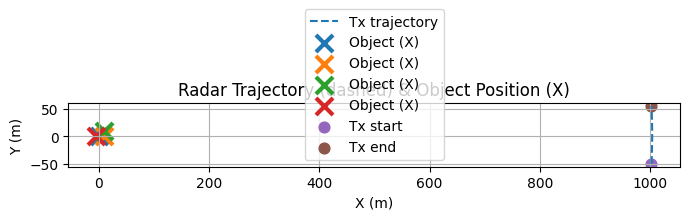

In [4]:
sensor_xyz = sar.get_sensor_positions()
plot_radar_trajectory_and_object(
    object_xyz=objects,
    tx_traj=sensor_xyz, rx_traj=sensor_xyz,
    bistatic=False,          # True로 바꾸면 Tx/Rx 둘 다 점선 표시
)

In [ ]:
bp_image, xi, yi = sar.backprojection_image(p_signal)


10-th BP pulses
20-th BP pulses
30-th BP pulses
40-th BP pulses
50-th BP pulses
60-th BP pulses
70-th BP pulses
80-th BP pulses
90-th BP pulses
100-th BP pulses
110-th BP pulses
120-th BP pulses
130-th BP pulses
140-th BP pulses
150-th BP pulses
160-th BP pulses
170-th BP pulses
180-th BP pulses
190-th BP pulses
200-th BP pulses
210-th BP pulses
220-th BP pulses
230-th BP pulses
240-th BP pulses
250-th BP pulses
260-th BP pulses
270-th BP pulses
280-th BP pulses
290-th BP pulses
300-th BP pulses
310-th BP pulses
320-th BP pulses
330-th BP pulses
340-th BP pulses
350-th BP pulses
360-th BP pulses
370-th BP pulses
380-th BP pulses
390-th BP pulses
400-th BP pulses
410-th BP pulses
420-th BP pulses
430-th BP pulses
440-th BP pulses
450-th BP pulses
460-th BP pulses
470-th BP pulses
480-th BP pulses
490-th BP pulses
500-th BP pulses
510-th BP pulses
520-th BP pulses
530-th BP pulses
540-th BP pulses
550-th BP pulses
560-th BP pulses
570-th BP pulses
580-th BP pulses
590-th BP pulses
600-th

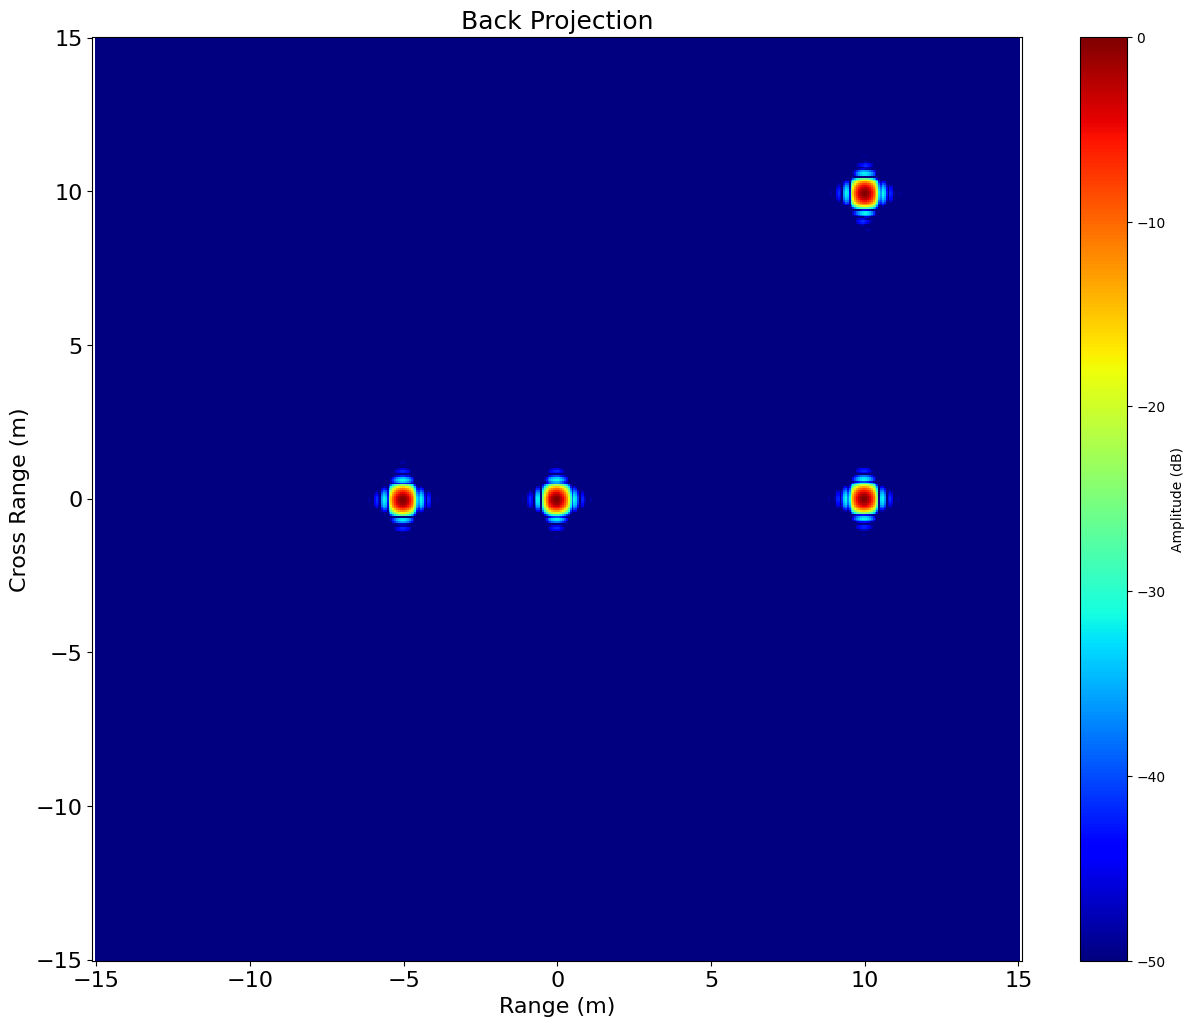

In [ ]:

dynamic_range = 50
# Set the figure size
plt.rcParams["figure.figsize"] = (15, 12)

# Plot the backprojected image
plt.figure()
plt.pcolor(xi, yi, 20 * np.log10(np.abs(bp_image) / np.max(np.abs(bp_image))), cmap='jet', vmin=-abs(dynamic_range), vmax=0)

# Set the title and labels
plt.title('Back Projection', size=18)
plt.xlabel('Range (m)', size=16)
plt.ylabel('Cross Range (m)', size=16)



# Make the axes equal
plt.axis('equal')

# Set the tick label size
plt.tick_params(labelsize=16)

# Turn on the colorbar and set the label
cbar = plt.colorbar()
cbar.set_label('Amplitude (dB)')

# Show the figure
plt.show()